In [39]:
import pandas as pd
import numpy as np

In [40]:
# import 3 csv files
data1 = pd.read_csv("assignment1_data/data1.csv", sep=";")
data2 = pd.read_csv("assignment1_data/data2.csv", sep=";")
data3 = pd.read_csv("assignment1_data/data3.csv", sep=";")
# data1 and data2 will be merge on ID, making it 22+17-1=38 columns
# Merged dtfm will concatenate with data3 to create a dtfm of 4424 records and 38 attributes
data = pd.concat([pd.merge(data1, data2), data3])
print(data1.shape, data2.shape, data3.shape, data.shape)

(3424, 22) (3424, 17) (1000, 38) (4424, 38)


In [41]:
# Firstly, the summary of joint dataframe was checked
data.info()
# Evidently, column "Tuition fees up to date" and "International"
# are having some null values due to non-null count not equal to 4424

<class 'pandas.core.frame.DataFrame'>
Index: 4424 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              4424 non-null   int64  
 1   Marital status                                  4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4424 non-null   int64  
 5   Daytime/evening attendance                      4424 non-null   object 
 6   Previous qualification                          4424 non-null   int64  
 7   Previous qualification (grade)                  4424 non-null   float64
 8   Nationality                                     4424 non-null   int64  
 9   Mother's qualification                         

#### Missing values

In [42]:
# Checking "Tuition fees up to date" in general
print(
    "Both numbers adds up to 3424, which is the number of students when merging the first 2 dtfms",
    data1["Tuition fees up to date"].value_counts(),
    sep="\n"
)
print("\nSo all of Nan values are in the third one",
      data3["Tuition fees up to date"].value_counts(),
      sep="\n"
)

Both numbers adds up to 3424, which is the number of students when merging the first 2 dtfms
Tuition fees up to date
1    3032
0     392
Name: count, dtype: int64

So all of Nan values are in the third one
Tuition fees up to date
0.0    136
Name: count, dtype: int64


In [43]:
# Checking "Tuition fees up to date" with an additional "Debtor" column.
print(data[["Tuition fees up to date", "Debtor"]].value_counts(), "\n")
# So most of the students who have pay their fees, the chance of being a debtor are likely to be 0.

# Checking the Nan value of "Tuition fees up to date"
print(data[data["Tuition fees up to date"].isnull()].Debtor.value_counts(), "\n")
# With the majority of the students are in the non-debt area, there is a evidence to fill Nan values.

print("fillna can be a viable choice.\nBut that may introduce bias into the subsequent analysis particularly in here when missingness seems not to be random.\nThe value will be left intact.")

Tuition fees up to date  Debtor
1.0                      0         2825
0.0                      0          282
                         1          246
1.0                      1          207
Name: count, dtype: int64 

Debtor
0    814
1     50
Name: count, dtype: int64 

fillna can be a viable choice.
But that may introduce bias into the subsequent analysis particularly in here when missingness seems not to be random.
The value will be left intact.


In [44]:
# Checking "International" using an additional "Nationality" column.
print(data[["International", "Nationality"]].value_counts())
print("\nTotal:                       ", data[["International", "Nationality"]].value_counts().sum())
# In here, International = 0 and Nationality = 1 are native student.
print("\n", data[data.International.isnull()].Nationality.value_counts())
# Turns out, only some of the native students are missing values

International  Nationality
0.0            1              3337
1.0            41               38
               26               14
               6                13
               22               13
               24                5
               11                3
               103               3
               100               3
               105               2
               101               2
               62                2
               25                2
               2                 2
               21                2
               32                1
               17                1
               14                1
               13                1
               108               1
               109               1
Name: count, dtype: int64

Total:                        3447

 Nationality
1    977
Name: count, dtype: int64


In [45]:
# With that said, the remaining NaN will be filled accordingly
data.International.fillna(0, inplace=True)

print(data[["International", "Nationality"]].value_counts())
print("Total:                       ", data[["International", "Nationality"]].value_counts().sum())

International  Nationality
0.0            1              4314
1.0            41               38
               26               14
               6                13
               22               13
               24                5
               11                3
               103               3
               100               3
               105               2
               101               2
               62                2
               25                2
               2                 2
               21                2
               32                1
               17                1
               14                1
               13                1
               108               1
               109               1
Name: count, dtype: int64
Total:                        4424


#### Duplicates

In [46]:
print("Number of duplicated row: ", data.duplicated().sum())
# No duplicated rows, moving on

Number of duplicated row:  0


#### Impossible values and whitespaces

In [47]:
# Using descriptive statistics for inspecting anomolies
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4424.0,NaN,NaN,NaN,2212.5,1277.243125,1.0,1106.75,2212.5,3318.25,4424.0
Marital status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime/evening attendance,4424,5,1,3051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previous qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous qualification (grade),4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nationality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mother's qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0


---
Using the table above, the actual value can be evaluated using Appendix - Table 2:
* **Daytime/evening attendance**: 5 unique values instead of 0 and 1
* **Father's qualification**: 57 unique values, way more than 45 possible values
* **Age at enrollment**: A maximum value of 444, breaking the cap of 70
* **Target**: 7 unique values instead of 3 possible values

In [48]:
# For a more exclusive look
data.describe(include="all").transpose().loc[
    ["Daytime/evening attendance", "Father's qualification", "Age at enrollment", "Target"]
]

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Daytime/evening attendance,4424,5,1,3051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Father's qualification,4424,57,37,942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at enrollment,4424.0,NaN,NaN,NaN,24.734403,23.030894,17.0,19.0,20.0,25.0,444.0
Target,4424,7,Graduate,2206,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

In [49]:
# Checking Daytime/evening attendance column
print("The unique values are: ", data["Daytime/evening attendance"].unique())
print(data["Daytime/evening attendance"].value_counts())

The unique values are:  ['1' '0' 'Y' 1 0]
Daytime/evening attendance
1    3051
1     883
0     366
0     117
Y       7
Name: count, dtype: int64


In [50]:
# The problem lies in the string 1, 0 and Y
# Attempting to fix
data["Daytime/evening attendance"] = data["Daytime/evening attendance"].replace('1',1)
data["Daytime/evening attendance"] = data["Daytime/evening attendance"].replace('0', 0)
data["Daytime/evening attendance"] = data["Daytime/evening attendance"].replace('Y', 1)
# Solved: 1/4
print("The unique values are: ", data["Daytime/evening attendance"].unique())
print(data["Daytime/evening attendance"].value_counts())

The unique values are:  [1 0]
Daytime/evening attendance
1    3941
0     483
Name: count, dtype: int64


---

In [51]:
# Checking Father's qualification column
print("The unique values are: ", data["Father's qualification"].unique(), "\n")

data["Father's qualification"] = pd.to_numeric(
    data["Father's qualification"],
    errors='coerce'
)

print("The unique values now are: ", data["Father's qualification"].unique(), "\n")
# Nan value is still persist

# A potential way to fill Nan value is to find the similarity in other records
c = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
print(data[data["Father's qualification"].isnull()][c].T, "\n")

print(data[(data["Mother's qualification"]==38)]["Father's qualification"].value_counts(), "\n")
# Comparing against the "Mother's qualification" column, there is an evidence to fill it with value 38.

#data["Father's qualification"].fillna(38, inplace = True)
print("Even though it can be neglectable\nNan value will still be left intact since there are no real reason to fill it while risking missing real data.")
# Solved: 2/4

The unique values are:  ['39' '34' '37' '1' '38' '19' '2' '3' '35' '11' '25' '5' '26' '40' '41'
 '4' '22' '20' '29' '31' '36' '6' '12' '9' '27' '14' '10' '44' '33' '13'
 '30' '          ' '18' '43' 1 19 37 38 4 3 34 2 39 12 5 11 9 36 14 43 22
 42 41 10 6 40 30] 

The unique values now are:  [39. 34. 37.  1. 38. 19.  2.  3. 35. 11. 25.  5. 26. 40. 41.  4. 22. 20.
 29. 31. 36.  6. 12.  9. 27. 14. 10. 44. 33. 13. 30. nan 18. 43. 42.] 

                        2598
Mother's qualification  38.0
Father's qualification   NaN
Mother's occupation      5.0
Father's occupation      7.0 

Father's qualification
38.0    203
37.0    168
19.0    123
1.0      53
3.0       7
34.0      2
31.0      1
14.0      1
12.0      1
36.0      1
2.0       1
Name: count, dtype: int64 

Even though it can be neglectable
Nan value will still be left intact since there are no real reason to fill it while risking missing real data.


---

In [52]:
# Checking Age at enrollment column
print(data["Age at enrollment"].unique(), "\n")
print("Before:", data["Age at enrollment"].describe(), sep="\n")

# There are 3 unique values that can mess up the measurement of the column
# specifically mean, std, and the max age.

data["Age at enrollment"].replace([222,333,444], np.nan, inplace=True)
print("\n","After:", data["Age at enrollment"].describe(), sep="\n")

# After exploring, there seems to be no obvious pattern to fill with a particular value

# The value will be replaced with NaN for 2 reasons:
# 1. There are no dominant pattern to fill Nan, it will be haphazardly
# 2. This can help to ensure that the the values do not introduce bias or noise into subsequent analyses.

# Solved: 3/4

[333  70  62  61  60  59  58  57  55  54  53  52  51  50  49  48  47  46
  45  44 444  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22 222  21  20  19  18  17] 

Before:
count    4424.000000
mean       24.734403
std        23.030894
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max       444.000000
Name: Age at enrollment, dtype: float64


After:
count    4402.000000
mean       23.218991
std         7.569550
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64


---

In [53]:
# Checking Target column
print("The unique values are: ", data["Target"].unique(), "\n")
print(data["Target"].value_counts())

The unique values are:  ['Drpout' 'Dropout' 'Graduate' 'Enrolled' 'Dropot' 'Grduate' 'enroled'] 

Target
Graduate    2206
Dropout     1417
Enrolled     792
Dropot         3
Grduate        3
enroled        2
Drpout         1
Name: count, dtype: int64


In [54]:
# Typo, apparently
data["Target"] = data["Target"].str.replace('Drpout', 'Dropout')
data["Target"] = data["Target"].str.replace('Dropot', 'Dropout')
data["Target"] = data["Target"].str.replace('Grduate', 'Graduate')
data["Target"] = data["Target"].str.replace('enroled', 'Enrolled')
# Solved: 4/4
print("The unique values are: ", data["Target"].unique(), "\n")
print(data["Target"].value_counts())

The unique values are:  ['Dropout' 'Graduate' 'Enrolled'] 

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


---

In [55]:
# The complete dataset after cleaning
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4424.0,NaN,NaN,NaN,2212.5,1277.243125,1.0,1106.75,2212.5,3318.25,4424.0
Marital status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime/evening attendance,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous qualification (grade),4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nationality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mother's qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, '0.5'), Text(0, 0, '0.32'), Text(0, 0, '0.18')]

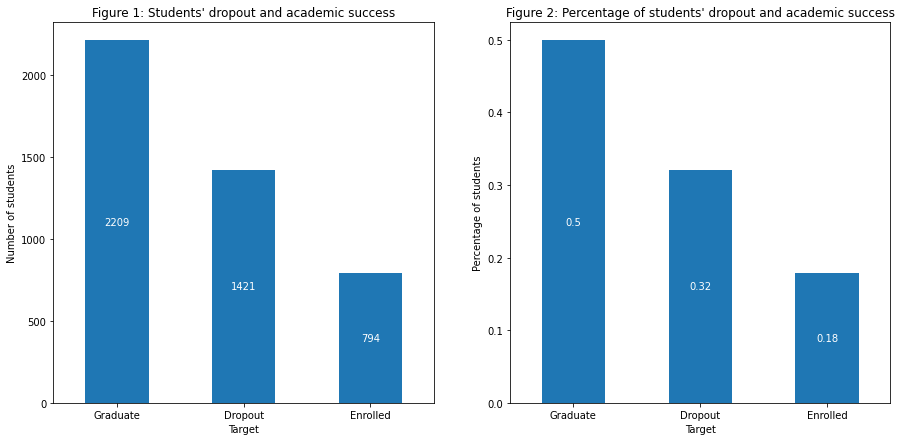

In [57]:
# Categorical column: Target
# Drawing Target column with bar chart using Pandas.plot.bar()

# matplotlib.pyplot.subplots is used for compact view
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
data["Target"].value_counts().plot.bar(
    ax=axes[0],
    title = "Figure 1: Students' dropout and academic success",
    ylabel = "Number of students",
    xlabel = "Target",
    rot = 0
)

data["Target"].value_counts(normalize=True).plot.bar(
    ax=axes[1],
    title = "Figure 2: Percentage of students' dropout and academic success",
    ylabel = "Percentage of students",
    xlabel = "Target",
    rot = 0
)
# Axes.bar_label are included for values displayed inside vertical bar
axes[0].bar_label(axes[0].containers[0], label_type="center", color='w')
axes[1].bar_label(axes[1].containers[0], fmt='%.2g', label_type="center", color='w')

[Text(0, 0, '1952'),
 Text(0, 0, '1092'),
 Text(0, 0, '239'),
 Text(0, 0, '278'),
 Text(0, 0, '198'),
 Text(0, 0, '116'),
 Text(0, 0, '137'),
 Text(0, 0, '106'),
 Text(0, 0, '61'),
 Text(0, 0, '69'),
 Text(0, 0, '53'),
 Text(0, 0, '29'),
 Text(0, 0, '36'),
 Text(0, 0, '18'),
 Text(0, 0, '5'),
 Text(0, 0, '8'),
 Text(0, 0, '4'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

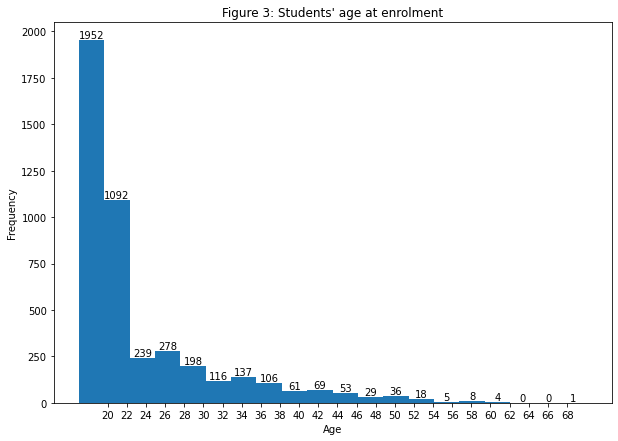

In [58]:
# Numerical column: Age at enrollment
# Drawing histogram to see age distribution
ax = data["Age at enrollment"].plot.hist(
    figsize=(10,7),
    grid=False,
    bins=20,
    title = "Figure 3: Students' age at enrolment",
    xlabel = "Age",
    xticks = range(20,70,2)
)
ax.bar_label(ax.containers[0], label_type="edge")

Text(0.5, 1.0, 'Figure 4: Heatmap of the students age at enrollment')

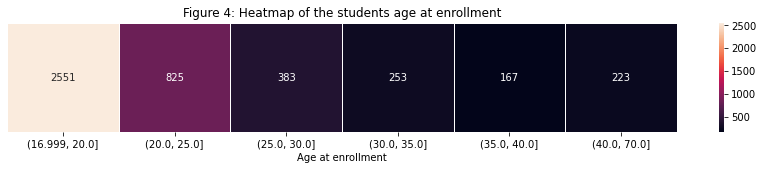

In [59]:
# Drawing all students' age at enrollment using seaborn.heatmap
plt.figure(figsize=(15,2))
ax = sns.heatmap(data["Age at enrollment"].value_counts(bins=[17,20,25,30,35,40,70]).sort_index().to_frame().T,
            annot=True,
            fmt='d',
            linewidths=.5,
            cmap='rocket'
)
ax.axes.get_yaxis().set_visible(False)
ax.set_title('Figure 4: Heatmap of the students age at enrollment')

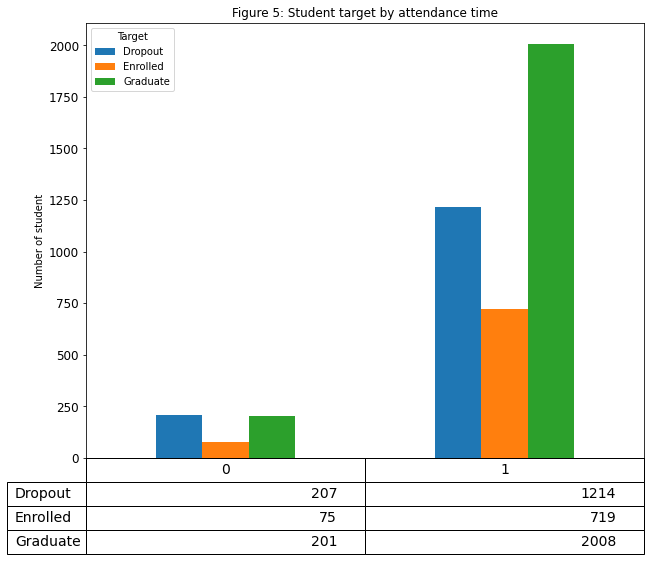

In [60]:
# 1st pair: Daytime/evening attendance and Target

# Identifying day or evening attendance impact on student academic records
ax = pd.crosstab(data["Daytime/evening attendance"], data["Target"]).plot.bar(
    figsize = (10,8),
    title = 'Figure 5: Student target by attendance time',
    ylabel = 'Number of student',
    rot=0,
    fontsize = 12,
    table=True
)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
table.set_fontsize(14)
# Rescaling the rows to be more readable.
table.scale(1,2)
# daytime = 1, evening = 0.

# Inspired by
# https://stackoverflow.com/questions/39668665/format-a-table-that-was-added-to-a-plot-using-pandas-dataframe-plot

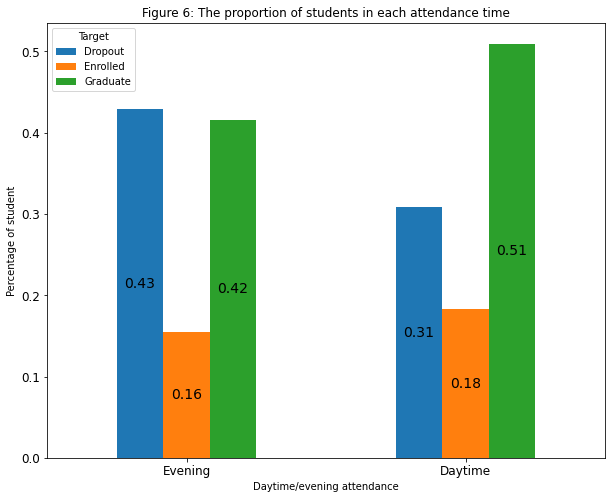

In [61]:
# Demonstrate the percentage of student status in each attendance period
perc1 = pd.crosstab(data["Target"], data["Daytime/evening attendance"])/data["Daytime/evening attendance"].value_counts()
ax = perc1.transpose().plot.bar(
    figsize = (10,8),
    title = 'Figure 6: The proportion of students in each attendance time',
    ylabel = 'Percentage of student',
    rot=0,
    fontsize = 12
)
ax.set_xticklabels(("Evening", "Daytime"))
# Labeling individual bar
for p in ax.containers:
    ax.bar_label(p, fmt='%.2f', label_type='center', fontsize=14)

---

In [62]:
# 2nd pair: Daytime/evening attendance and Curricular units 1st sem (grade)
# Binning grades to group the 0 together, as well as distribute the range for clear visualisation
bins = [-0.1,10,12,14,16,20]
tem = pd.crosstab(pd.cut(data["Curricular units 1st sem (grade)"], bins = bins), data["Daytime/evening attendance"])
tem

Daytime/evening attendance,0,1
Curricular units 1st sem (grade),,
"(-0.1, 10.0]",109,692
"(10.0, 12.0]",196,1018
"(12.0, 14.0]",144,1692
"(14.0, 16.0]",33,499
"(16.0, 20.0]",1,40


[Text(0.5, 0, 'Evening'), Text(1.5, 0, 'Daytime')]

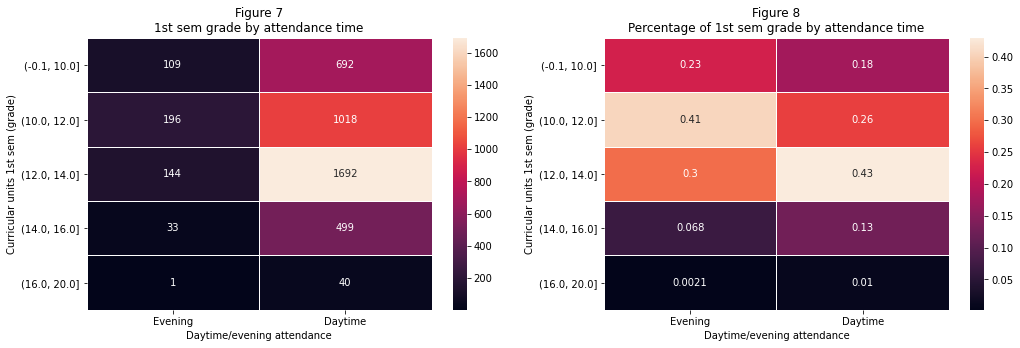

In [63]:
# Drawing the DataFrame using seaborn.heatmap, one for number, one for percentage
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))

sns.heatmap(tem,
    ax = axes[0],
    annot=True,
    fmt='d',
    linewidths=.5,
    cmap='rocket'
)
axes[0].set_title('Figure 7\n1st sem grade by attendance time')
axes[0].set_xticklabels(("Evening", "Daytime"))

sns.heatmap(tem/data["Daytime/evening attendance"].value_counts(),
    ax = axes[1],
    annot=True,
    fmt='.2g',
    linewidths=.5,
    cmap='rocket'
)
axes[1].set_xlabel("Daytime/evening attendance")
axes[1].set_title('Figure 8\nPercentage of 1st sem grade by attendance time')
axes[1].set_xticklabels(("Evening", "Daytime"))

# inspired by
# https://www.geeksforgeeks.org/python-titanic-data-eda-using-seaborn/

---

In [64]:
# 3rd pair: Daytime/evening attendance and Curricular units 2nd sem (grade)
bins = [-0.1,10,12,14,16,18,20]
tem2 = pd.crosstab(pd.cut(data["Curricular units 2nd sem (grade)"], bins = bins), data["Daytime/evening attendance"])
tem2

Daytime/evening attendance,0,1
Curricular units 2nd sem (grade),,
"(-0.1, 10.0]",122,825
"(10.0, 12.0]",177,959
"(12.0, 14.0]",135,1584
"(14.0, 16.0]",45,537
"(16.0, 18.0]",4,35
"(18.0, 20.0]",0,1


[Text(0.5, 0, 'Evening'), Text(1.5, 0, 'Daytime')]

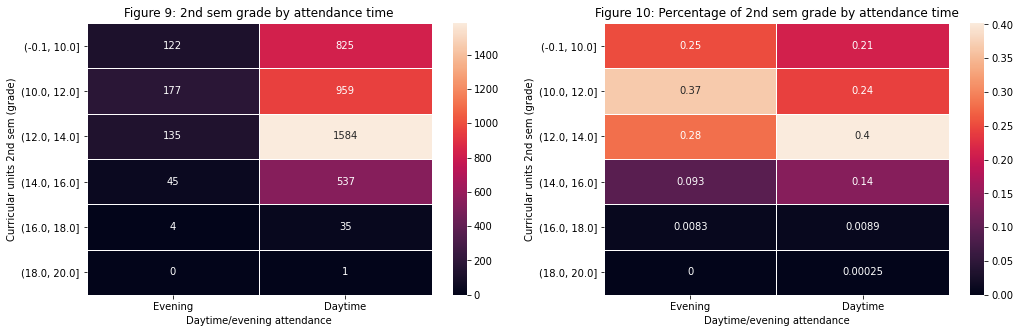

In [65]:
# Drawing the DataFrame using seaborn.heatmap, just like the 2nd pair
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))

sns.heatmap(tem2,
    ax = axes[0],
    annot=True,
    fmt='d',
    linewidths=.5,
    cmap='rocket'
)
axes[0].set_title('Figure 9: 2nd sem grade by attendance time')
axes[0].set_xticklabels(("Evening", "Daytime"))

sns.heatmap(tem2/data["Daytime/evening attendance"].value_counts(),
    ax = axes[1],
    annot=True,
    fmt='.2g',
    linewidths=.5,
    cmap='rocket'
)
axes[1].set_xlabel("Daytime/evening attendance")
axes[1].set_title('Figure 10: Percentage of 2nd sem grade by attendance time')
axes[1].set_xticklabels(("Evening", "Daytime"))

---

Text(0.5, 0.98, 'Figure 11: Number of curricular units credited, enrolled, and approved for the first and second semester')

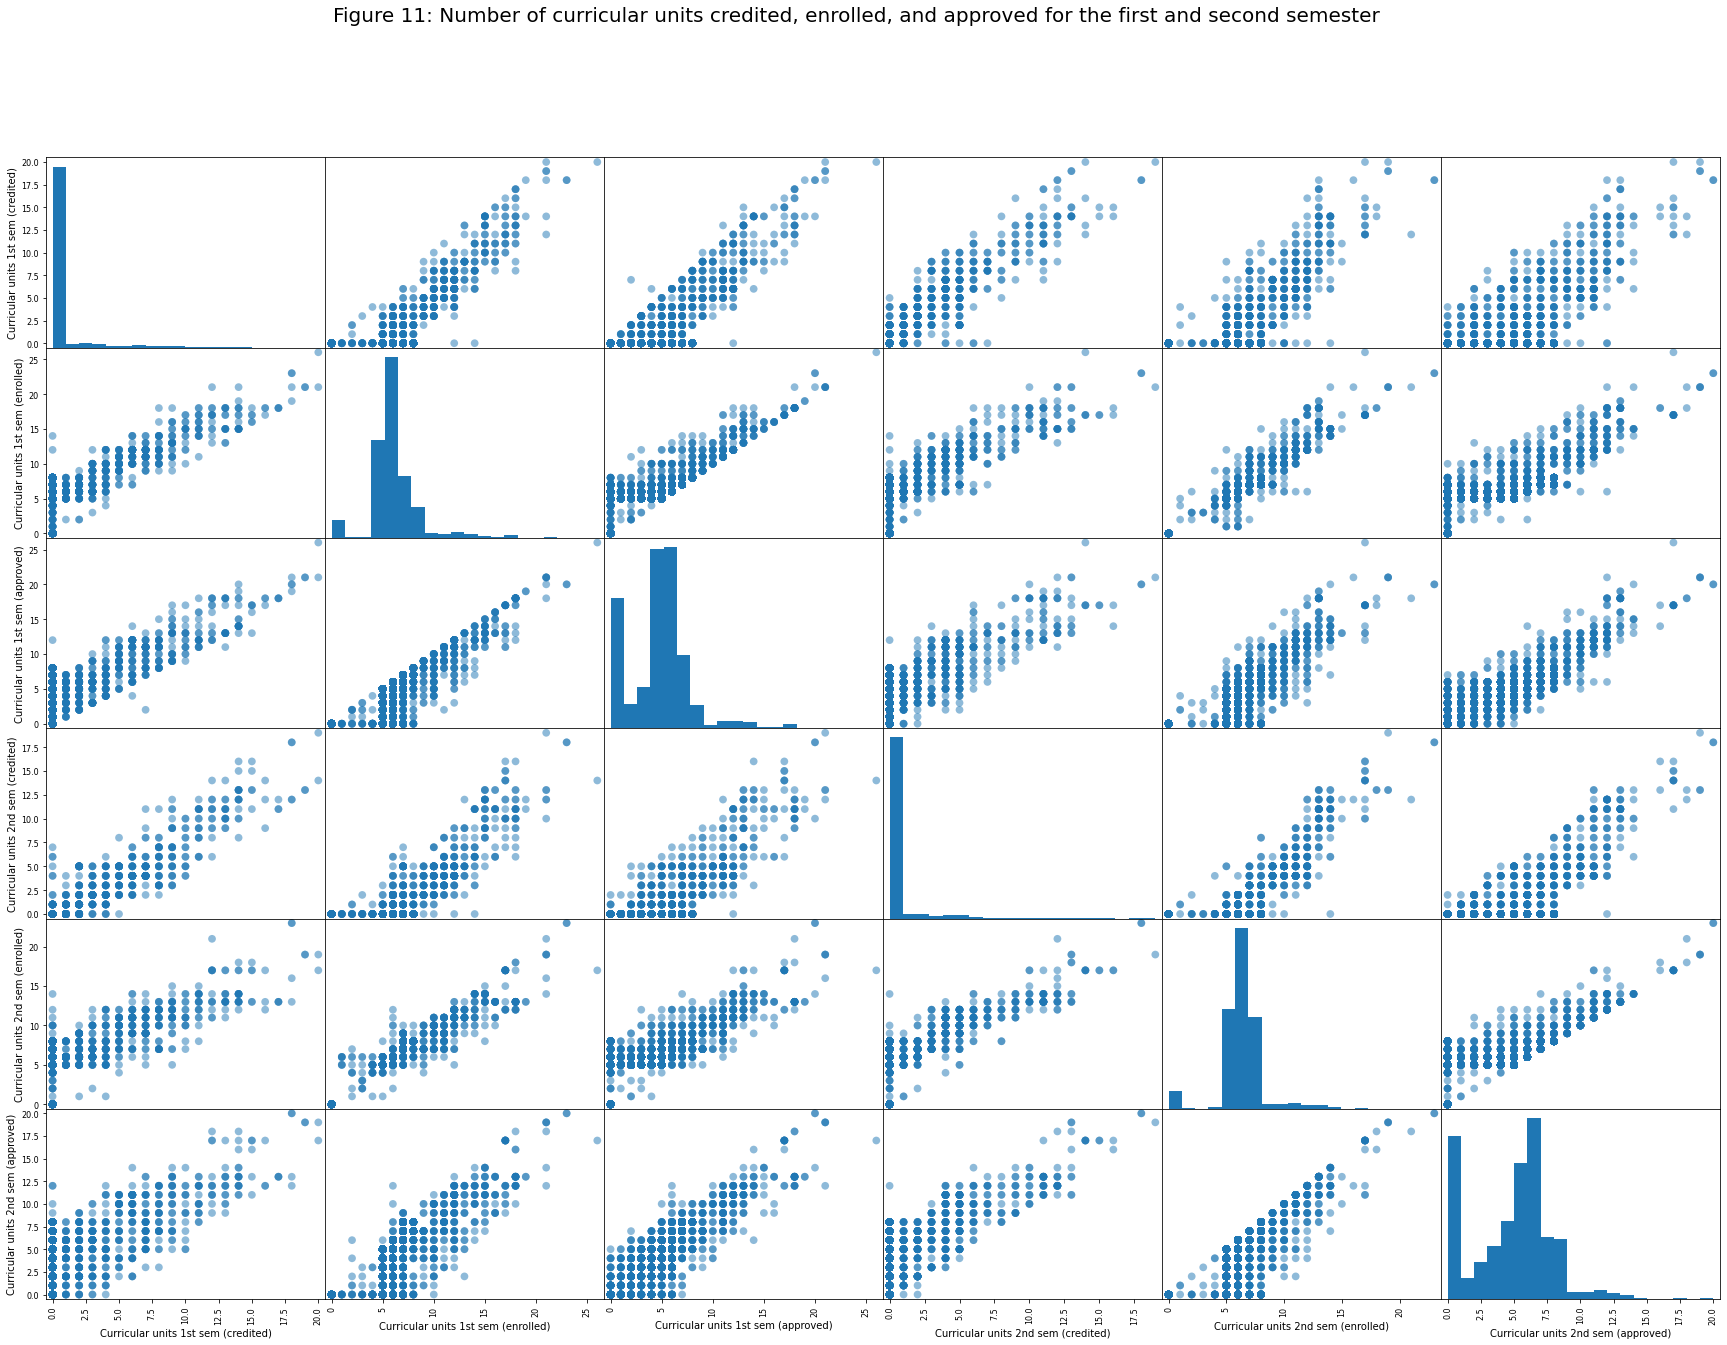

In [66]:
# 6 numeric columns were chosen since these columns are likely to correlated to each other
data_6col = data[["Curricular units 1st sem (credited)",
                "Curricular units 1st sem (enrolled)",
                "Curricular units 1st sem (approved)",
                "Curricular units 2nd sem (credited)",
                "Curricular units 2nd sem (enrolled)",
                "Curricular units 2nd sem (approved)"]]
pd.plotting.scatter_matrix(data_6col,
                        figsize=(30,21),
                            marker='o',
                            alpha=.5,
                            hist_kwds={'bins': 20},
                            s=60
)
plt.suptitle("Figure 11: Number of curricular units credited, enrolled, and approved for the first and second semester", fontsize = 20)